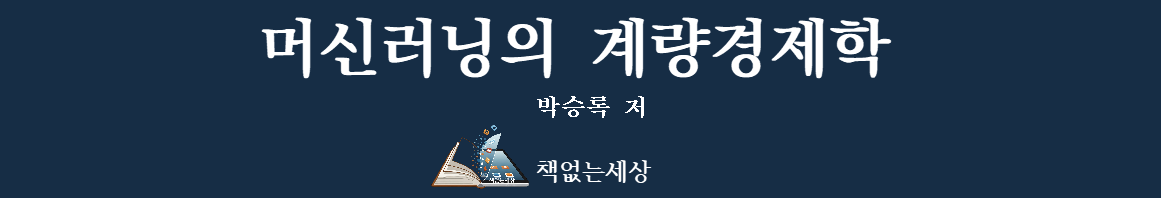

# Part 10: 딥러닝의 계량경제학

## Chapter 2: 딥러닝의 응용 사례- 회귀분석, 이진 분류, 다중 분류, 이미지 인식

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
# 현재 작업공간(working directory)확인  
os.getcwd() 

import warnings
warnings.filterwarnings("ignore")

## 1. 보스턴(Boston) 주택 가격 예측을 위한 회귀모형

In [2]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# 데이터 불러오기
dataframe = read_csv("Data/housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:, 0:13]
y = dataset[:, 13]

# 출력 변수 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# X, Y 각각 스케일링
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 모형 정의
def wider_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(13,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Pipeline을 이용한 교차검증
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(f"Cross-validation mean MSE: {-results.mean():.4f}, std: {results.std():.4f}")

# 전체 데이터로 최종 모델 학습
final_model = wider_model()
final_model.fit(X_scaled, y_scaled, epochs=100, batch_size=5, verbose=0)

# 새로운 데이터 예측
new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]])
new_data_scaled = scaler_X.transform(new_data)
predicted_price_scaled = final_model.predict(new_data_scaled)

# 예측값을 원래 스케일로 복원
predicted_price = scaler_y.inverse_transform(predicted_price_scaled)

print("Predicted house price:", predicted_price[0][0])

Cross-validation mean MSE: 20.6882, std: 22.9681
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted house price: 26.079487


##  2. 아이리스 품종의 다중 클래스 분류

Accuracy: 98.00% (3.06%)
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3150 - loss: 2.2838 - val_accuracy: 0.3667 - val_loss: 1.9037
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2825 - loss: 2.0796 - val_accuracy: 0.3667 - val_loss: 1.6236
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3881 - loss: 1.5576 - val_accuracy: 0.3667 - val_loss: 1.4184
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3284 - loss: 1.4706 - val_accuracy: 0.3667 - val_loss: 1.2772
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3348 - loss: 1.2488 - val_accuracy: 0.3667 - val_loss: 1.1919
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3553 - loss: 1.1734 - val_accuracy: 0.3667 - val_loss: 1.1297
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3298 - loss: 1.1154 - val_accuracy: 0.3667 - val_loss: 1.0891
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2693 - loss: 1.1598 

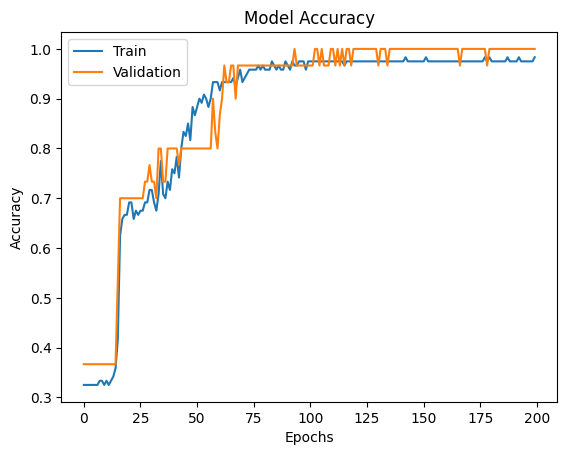

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score, KFold
from scikeras.wrappers import KerasClassifier

# 데이터세트 불러오기
dataframe = pd.read_csv("Data/iris.csv", header=None)
dataset = dataframe.values

# 데이터 전처리
X = dataset[:, 0:4].astype(float)
y = dataset[:, 4]

encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
dummy_y = to_categorical(encoded_y)

# 신경망 모형 구축
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(4,), activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 모형 평가 및 성능 분석
kfold = KFold(n_splits=10, shuffle=True)
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=5, verbose=0)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
  
# 학습 정확도와 검증 정확도 도표 그리기
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)
model = baseline_model() 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 3. Sonar 데이터를 활용한 이진 분류

In [14]:
# Binary Classification with Sonar Dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# 가 데이터 준비
dataframe = read_csv("Data/sonar3.csv", header=None)
dataset = dataframe.values

# 투입변수(X) 와 산출(Y) 정의 
X = dataset[:,0:60].astype(float)
y = dataset[:,60]

# 클래스 레이블 변환
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# 나. 신경망 모형 설계
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(60,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 다. 모형 평가
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 83.67% (7.13%)


In [15]:
# 라. 모형 개선
# 1) 데이터 표준화(기본모형)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized Accuracy: 86.05% (5.04%)


In [16]:
# 2) 모형 구조 확장
def create_larger():
    model = Sequential()
    model.add(Dense(60, input_shape=(60,), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 모형 평가
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.10% (5.40%)
Standardized Accuracy: 88.45% (5.74%)


In [17]:
# 예측 수행
# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# 모형 생성 및 학습
model = create_larger()
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

# 테스트 데이터로 예측
predictions = model.predict(X_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

print("\n예측 결과 (이진화):")
print(binary_predictions) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

예측 결과 (이진화):
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]


## [보완] 4. MNIST 데이터세트을 이용한 숫자 이미지 인식

In [ ]:
import tensorflow 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 이미지를 784차원 벡터로 펼치기
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# 픽셀 값을 0-1 범위로 정규화
X_train /= 255
X_test /= 255

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
display(y_train, X_train)

# 모형 정의
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모형 학습
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 모형 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

# 모형 예측
predictions = model.predict(X_test)
print(predictions)

model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mnist_model.png',
    show_shapes=True, show_dtype=True, show_layer_names=True,
    expand_nested=True, show_layer_activations=True)